In [1]:
# import all relevant libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import pathlib
import glob

import wfdb

from fastai.tabular.all import *
from tsai.all import *
import torch

# assign the correct path to downloaded data and filenames
# realpath is this script path, while data is subfolder in the same dir
# parent_dir =  os.path.dirname(os.path.realpath(__file__))

parent_dir = pathlib.Path(os.path.abspath('')).parents[0]
data_dir = os.path.join(parent_dir, 'data\\')
raw_dir = os.path.join(parent_dir, 'data\\raw\\')
processed_dir = os.path.join(parent_dir, 'data\\processed\\')


filenames = []

for i in range(10):
    filenames.append('infant'+str(i+1))

# print and list all relevant filenames, as a quick check
print(parent_dir)
print(data_dir)
print(processed_dir)
print(filenames)


def describe_df(df):
    desc = df.describe()
    desc.loc['count'] = desc.loc['count'].astype(int).astype(str)
    desc.loc['nunique'] = df.nunique()
    desc.loc['count_na'] = df.isna().sum()
    desc.iloc[1:] = desc.iloc[1:].applymap('{:.6f}'.format)
    print(desc)


f:\Education\ecg_resp
f:\Education\ecg_resp\data\
f:\Education\ecg_resp\data\processed\
['infant1', 'infant2', 'infant3', 'infant4', 'infant5', 'infant6', 'infant7', 'infant8', 'infant9', 'infant10']


In [2]:
# import preprocessing folders & shared functions

import sys
sys.path.append(os.path.join(parent_dir, 'preprocessing/'))


In [3]:
import self_shared as ss


all_files = glob.glob(os.path.join(processed_dir, "dfg_infant1*.csv"))

dfg = pd.concat((pd.read_csv(f, converters={'resp': lambda s: [float(
    x.strip(' []')) for x in s.split(',')]}) for f in all_files), ignore_index=True)



# Xn, y = ss.gen_numpy(dfg)

# X = to3d(Xn)


# splits = get_splits(y, valid_size=.2, stratify=True,
#                     random_state=23, shuffle=True)

# check_data(X, y, splits)
# X.shape, y.shape


In [4]:
import self_shared as ss
dff = ss.gen_flat_df(dfg[['resp','hr']])
dff


resp          hr      resp1      resp2      resp3      resp4  \
0      30.005553  139.830508  29.874837  29.809478  29.749147  29.611392   
1      35.283498  157.563025  35.159820  34.955701  34.636953  34.323232   
2      32.647040  147.540984  33.092482  33.549992  33.997445  34.448921   
3      32.393650   149.68815  32.647040  32.845126  33.031146  33.096505   
4      37.283466  145.877378  37.346814  37.530823  37.977271  38.499133   
...          ...         ...        ...        ...        ...        ...   
29440  23.892926  158.227848  23.894418  23.892926  23.941414  23.986919   
29441  24.692614  154.320988  24.639650  24.646364  24.650839  24.605335   
29442  24.791083  155.279503  24.791083  24.745579  24.791083  24.744087   
29443  24.225632  155.925156  24.177143  24.175652  24.128655  24.083150   
29444  24.647856  154.506438  24.603843  24.600859  24.553862  24.553862   

           resp5      resp6      resp7      resp8  ...    resp491    resp492  \
0      29.619436  29.611392  29.756186  30.135265  ...  33.241063  33.241063   
1      33.675681  33.025113  32.324270  31.998483  ...  31.227253  31.231275   
2      34.636953  35.030109  35.545937  35.858652  ...  31.680740  31.610354   
3      33.152813  33.224205  33.216161  33.152813  ...  33.993423  34.959723   
4      38.830953  39.408118  39.914897  40.187392  ...  34.834033  34.576622   
...          ...        ...        ...        ...  ...        ...        ...   
29440  24.031678  24.080166  24.127163  24.174160  ...  24.080166  24.077182   
29441  24.600859  24.458377  24.411381  24.371098  ...  24.369606  24.509850   
29442  24.691122  24.691122  24.649347  24.555354  ...  24.509850  24.464345   
29443  24.086134  24.039884  24.039884  23.892926  ...  24.833604  24.841064   
29444  24.461361  24.459869  24.412873  24.415856  ...  24.655315  24.600859   

         resp493    resp494    resp495    resp496    resp497    resp498  \
0      33.241063  33.241063  33.241063  33.241063  33.241063  33.241063   
1      31.293617  31.549018  31.745093  32.000494  32.196569  32.509284   
2      31.484665  31.741071  31.804419  31.990439  31.998483  32.061830   
3      35.734974  36.378503  36.569551  36.831990  37.023038  37.209058   
4      34.052749  33.602278  33.094494  32.777756  32.317231  31.936141   
...          ...        ...        ...        ...        ...        ...   
29440  24.222648  24.318133  24.369606  24.511342  24.558338  24.647856   
29441  24.597875  24.649347  24.691122  24.739611  24.786607  24.791083   
29442  24.467329  24.411381  24.361400  24.316641  24.221156  24.218172   
29443  24.888060  24.888060  24.835096  24.786607  24.789591  24.742595   
29444  24.549386  24.553862  24.453901  24.414364  24.364384  24.313657   

         resp499    resp500  
0      33.241063  33.241063  
1      31.815165  31.815165  
2      32.128194  32.200591  
3      33.590510  33.590510  
4      31.802408  31.728000  
...          ...        ...  
29440  24.056797  24.056797  
29441  24.839572  24.792575  
29442  24.265274  24.265274  
29443  24.697836  24.697836  
29444  24.211554  24.211554  

[29445 rows x 502 columns]

In [5]:
from fastai.tabular.all import *

y_names = 'hr'
col = dff.columns.to_list()
col.remove(y_names)

idx = int(np.percentile(dff.index, 66))
splits = (L(range(idx, len(dff))),L(range(idx)))

splits

((#10012) [19433,19434,19435,19436,19437,19438,19439,19440,19441,19442...],
 (#19433) [0,1,2,3,4,5,6,7,8,9...])

In [11]:
data = dff.copy()
train_df = dff[:idx].copy()
test_df = dff[idx:].copy()



numpy.float64

In [9]:


procs = [FillMissing, Normalize,  Categorify]

pd.options.mode.chained_assignment = None

to = TabularPandas(df=data, cont_names=col, procs=procs, y_names=y_names, y_block=RegressionBlock(),
                   device=torch.device('cuda'), splits=splits, inplace=True, reduce_memory=True)

dls = to.dataloaders(bs=512)
dls.show_batch()


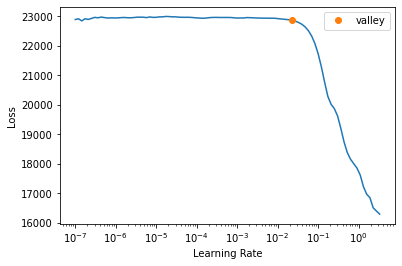

In [13]:
learn = tabular_learner(dls,
                        metrics=[R2Score(), mse, mae])
learn_rate = learn.lr_find()


In [20]:
learn.fit_one_cycle(30, learn_rate)


In [21]:
from sklearn import metrics as skm
d = dff.copy()

# dl = learn.dls.test_dl(d)
y_preds, y_actual = learn.get_preds(ds_idx=1)

# quick check of mse vs last learn mse
idx = 1
result_mse = skm.mean_squared_error(y_preds, y_actual, squared=False)
result_r2 = skm.r2_score(y_preds, y_actual)

result_mse, result_r2


(48.85601, -1.263846863792177)

In [23]:
to2 = TabularPandas(df=test_df, cont_names=col, procs=procs, y_names=y_names, y_block=RegressionBlock(),
                   device=torch.device('cuda'),  inplace=True, reduce_memory=True)

dls2 = to2.dataloaders(bs=512)

y_preds, y_actual = learn.get_preds(dl=dls2)

# quick check of mse vs last learn mse
idx = 1
result_mse = skm.mean_squared_error(y_preds, y_actual, squared=False)
result_r2 = skm.r2_score(y_preds, y_actual)

result_mse, result_r2


IndexError: index 9738 is out of bounds for dimension 0 with size 9728

In [ ]:
# save the model

PATH = Path('../models/Regression.pkl')
PATH.parent.mkdir(parents=True, exist_ok=True)
learn.export(PATH)

# # delete the variable
# del learn

# load back the model
PATH = Path('../models/Regression.pkl')
model = load_learner(PATH, cpu=False)
